In [2]:
## ML library -> sklearn
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
from sklearn.model_selection import train_test_split

# Leemos conjunto de ejemplos
X = iris.data
print(X[:5])
# Leemos valores de clase para cada ejemplo
y = iris.target
print(y[:5])
# Separamos el dataset en dos: entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print(y_train)
print(y_test)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
[1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Clasificación K Nearest neighbors 
k = 41
# Definición del clasificador
classifier = KNeighborsClassifier(n_neighbors=k)
# Entrenamiento del clasificador con lo datos de entrenamiento y valores de clase para cada ejemplo
classifier.fit(X_train, y_train)
# Predicción con el clasificador entrenado en los datos de evaluación 
y_predict = classifier.predict(X_test)

print(classifier)
print(X_test[:5])
print(y_predict[:5])
print(classifier.predict([[10.0, 5.0, 7.8, 0.1]]))


KNeighborsClassifier(n_neighbors=41)
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
[2 1 0 2 0]
[2]


In [34]:
# Medidas de rendimiento del clasificador
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(y_test[:5])
print(y_predict[:5])

print("Accuracy: {}".format(accuracy_score(y_test, y_predict)))
print("Precision: {}".format(precision_score(y_test, y_predict, average="macro")))
print("Recall: {}".format(recall_score(y_test, y_predict, average="macro")))
print("F-score: {}".format(f1_score(y_test, y_predict, average="macro")))

[2 1 0 2 0]
[2 1 0 2 0]
Accuracy: 0.8888888888888888
Precision: 0.8774509803921569
Recall: 0.883838383838384
F-score: 0.8799171842650103


In [35]:
from sklearn.metrics import classification_report

target_names = ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']
print(classification_report(y_test, y_predict, target_names=target_names))

                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        16
Iris-Versicolour       0.88      0.83      0.86        18
  Iris-Virginica       0.75      0.82      0.78        11

        accuracy                           0.89        45
       macro avg       0.88      0.88      0.88        45
    weighted avg       0.89      0.89      0.89        45



[[16  0  0]
 [ 0 15  3]
 [ 0  2  9]]


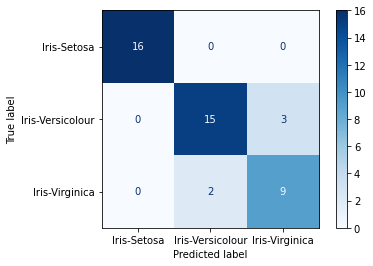

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_predict))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])  

In [37]:
# Predecir valor de clase de nuevo ejemplo
print(classifier.predict([[10.0, 5.0, 7.8, 0.1]]))

# Predecir probabilidad de clases de nuevo ejemplo
print(classifier.predict_proba([[10.0, 5.0, 7.8, 0.1]]))

#Predecir probabilidad de clases de nuevo ejemplo
print(classifier.kneighbors([[10.0, 5.0, 7.8, 0.1]]))

[2]
[[0.         0.19512195 0.80487805]]
(array([[3.37934905, 3.51425668, 3.86652299, 3.89871774, 4.08656335,
        4.12553027, 4.1484937 , 4.21070065, 4.25323406, 4.29534632,
        4.47437146, 4.68294779, 4.70106371, 4.71062629, 4.79374593,
        4.85180379, 4.85695378, 4.89387372, 4.90204039, 4.94267134,
        4.96286208, 4.96588361, 5.02891638, 5.0823223 , 5.13614642,
        5.13711982, 5.14684369, 5.15945734, 5.16139516, 5.22398315,
        5.25357021, 5.25832673, 5.26687763, 5.26782688, 5.27067358,
        5.33291665, 5.36749476, 5.5027266 , 5.50545184, 5.56686626,
        5.56956013]]), array([[ 71, 103,  76,  59,  69,   6,  22,  79,  53,  35,  38,  58,  39,
         45,  50,  13,  29,   2,   4,   1,  91,  40,  88, 101,  81,  44,
         86,  14,  41,  85,  47,  94,  25,  72,  10,   7,  64,   9,  87,
         31,  12]]))
